In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.combine import *
from imblearn.combine import *
from sklearn.metrics import classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from bayes_opt import BayesianOptimization
from lightgbm import LGBMRegressor

In [2]:
human_train = pd.read_csv("work/human.csv", encoding="cp949")
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")

In [3]:
# human_train

In [4]:
# human_train.info()

In [5]:
# human_train.isnull().sum()

In [6]:
# human_train["노동 계급"].value_counts()

In [7]:
# human_train["학력"].value_counts()

In [8]:
# human_train["혼인 상태"].value_counts()

In [9]:
# human_train["직업"].value_counts()

In [10]:
# human_train["관계"].value_counts()

In [11]:
# human_train["인종"].value_counts()

In [12]:
# human_train["모국"].value_counts()

In [13]:
# human_train["교육 수"].value_counts()

In [14]:
# human_train["자본 이득"].value_counts()

In [15]:
# human_train["자본 손실"].value_counts()

In [16]:
# human_train["주당 시간"].value_counts()

# Null값 제거

In [17]:
# human_train.dropna(subset=["노동 계급","직업","학력"],inplace=True)
# human_train

# 성별 수치형으로 변환

In [5]:
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.str.lstrip())
human_train[["성별"]] = human_train[["성별"]].apply(lambda x: x.astype('category').cat.codes)

In [4]:
# human_train["성별"] = human_train["성별"].str.strip()

In [5]:
# gender = {"Male":1, "Female":0}
# human_train["성별"] = human_train["성별"].map(gender)

In [6]:
human_train["성별"].value_counts()

1    21790
0    10771
Name: 성별, dtype: int64

# 파생 변수 만들기

In [6]:
s1=human_train['자본 이득']
s2=human_train['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_train = pd.concat([human_train,s],axis=1)

In [7]:
human_train['나이대'] = (human_train['나이']/10).astype(int)
human_train['주당 시간별'] = (human_train['주당 시간']/10).astype(int)
human_train['fnlwgt2'] = (human_train['fnlwgt']/10000).astype(int)

In [8]:
working_class = pd.get_dummies(human_train["노동 계급"])
human_train = pd.concat([human_train, working_class], axis=1)
# human_train.drop("노동 계급", axis=1, inplace=True)

human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_train[["노동 계급"]] = human_train[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [9]:
academic_ability = pd.get_dummies(human_train["학력"])
human_train = pd.concat([human_train,academic_ability],axis=1)
# human_train.drop("학력",axis=1,inplace=True)

human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.str.lstrip())
human_train[["학력"]] = human_train[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [10]:
marital_status = pd.get_dummies(human_train["혼인 상태"])
human_train = pd.concat([human_train,marital_status], axis=1)
# human_train.drop("혼인 상태", axis=1, inplace=True)

human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_train[["혼인 상태"]] = human_train[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [11]:
jobs = pd.get_dummies(human_train["직업"])
human_train = pd.concat([human_train, jobs], axis=1)
# human_train.drop("직업", axis=1, inplace=True)

human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.str.lstrip())
human_train[["직업"]] = human_train[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [12]:
relationship = pd.get_dummies(human_train["관계"])
human_train = pd.concat([human_train, relationship], axis=1)
# human_train.drop("관계", axis=1, inplace=True)

human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.str.lstrip())
human_train[["관계"]] = human_train[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [13]:
race = pd.get_dummies(human_train["인종"])
human_train = pd.concat([human_train, race], axis=1)
# human_train.drop("인종", axis=1, inplace=True)

human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.str.lstrip())
human_train[["인종"]] = human_train[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [14]:
homeland = pd.get_dummies(human_train["모국"])
human_train = pd.concat([human_train, homeland], axis=1)
# human_train.drop("모국", axis=1, inplace=True)

human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.str.lstrip())
human_train[["모국"]] = human_train[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [15]:
human_train.isnull().sum().sum()

0

# 데이터 나누기

In [16]:
htX = human_train.drop(["아이디","성별"], axis=1)
htY = human_train["성별"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(htX, htY, test_size=0.25, random_state=0)

In [28]:
htX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 114 entries, 나이 to  Yugoslavia
dtypes: int32(3), int64(7), int8(7), uint8(97)
memory usage: 5.3 MB


# Normalization

In [18]:
scaler = MinMaxScaler()
scaler.fit(htX)

MinMaxScaler()

In [19]:
x = scaler.transform(htX)
htX = pd.DataFrame(x, columns = htX.columns)

In [31]:
htX.describe().T

,count,mean,std,min,25%,50%,75%,max
나이,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
노동 계급,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
학력,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
교육 수,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
...,...,...,...,...,...,...,...,...
Thailand,32561.0,0.000553,0.023506,0.0,0.000000,0.000000,0.000000,1.0
Trinadad&Tobago,32561.0,0.000584,0.024149,0.0,0.000000,0.000000,0.000000,1.0
United-States,32561.0,0.895857,0.305451,0.0,1.000000,1.000000,1.000000,1.0
Vietnam,32561.0,0.002058,0.045316,0.0,0.000000,0.000000,0.000000,1.0


# Standardization

In [19]:
scaler = StandardScaler()
scaler.fit(htX)
x = scaler.transform(htX)
htX = pd.DataFrame(x, columns=htX.columns)

In [21]:
htX.describe()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,-1.737807e-16,-8.297776e-16,-8.840254e-17,-7.636385e-16,2.312098e-17,4.630504e-17,4.053588e-16,6.503880e-16,-1.639626e-15,-1.726862e-16,...,6.362374e-16,-1.833996e-15,-8.044147e-16,-2.670340e-15,-5.892619e-16,-8.950892e-16,2.531101e-15,1.214828e-15,7.960858e-17,4.459549e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-2.657320e+00,-1.681631e+00,-2.660895e+00,-3.529656e+00,-1.734058e+00,-1.554283e+00,-9.001808e-01,-4.318909e+00,-1.459205e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,-2.932948e+00,-4.540836e-02,-2.217266e-02
25%,-7.757679e-01,9.005041e-02,-6.816910e-01,-3.354369e-01,-4.200596e-01,-4.062122e-01,-8.448608e-01,-9.001808e-01,3.936675e-01,-1.459205e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02
50%,-1.159546e-01,9.005041e-02,-1.082193e-01,1.813316e-01,-3.136003e-02,-4.062122e-01,1.010359e-01,-2.778050e-01,3.936675e-01,-1.459205e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02
75%,6.904838e-01,9.005041e-02,4.478765e-01,4.397159e-01,7.460392e-01,9.216339e-01,8.104583e-01,9.669466e-01,3.936675e-01,-1.459205e-01,...,-3.372864e-02,-5.927412e-02,-1.920091e-02,-4.962840e-02,-3.960742e-02,-2.351838e-02,-2.416321e-02,3.409539e-01,-4.540836e-02,-2.217266e-02
max,3.769612e+00,2.837421e+00,1.226856e+01,1.214869e+00,2.300838e+00,2.249480e+00,1.756355e+00,2.211698e+00,3.936675e-01,1.339458e+01,...,2.964839e+01,1.687077e+01,5.208087e+01,2.014975e+01,2.524779e+01,4.251993e+01,4.138522e+01,3.409539e-01,2.202238e+01,4.510058e+01


# 샘플링

### 통합 샘플링

In [20]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(X_train, Y_train)
pred_tree3 = tree3.predict(X_test);

print(classification_report(Y_test, pred_tree3))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2701
           1       0.85      0.90      0.87      5440

    accuracy                           0.83      8141
   macro avg       0.81      0.79      0.80      8141
weighted avg       0.82      0.83      0.82      8141



In [21]:
htX, htY = SMOTETomek(random_state=0).fit_sample(X_train, Y_train)

In [22]:
tree3 = DecisionTreeClassifier(max_depth=10, random_state=0)
tree3.fit(htX, htY)
pred_tree3 = tree3.predict(X_test)

print(classification_report(Y_test, pred_tree3))

# (precision) 0 이라고 예측한 데이터의 74%만 실제로 0
# (precision) 1 이라고 예측한 데이터의 33%만 실제로 1
# (recall) 실제 0인 데이터중 56%만 0으로 판별됨 
# (recall) 실제 1인 데이타중 52%만 1로 판별됨

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2701
           1       0.90      0.83      0.86      5440

    accuracy                           0.82      8141
   macro avg       0.80      0.82      0.81      8141
weighted avg       0.83      0.82      0.82      8141



### 언더 샘플링 / 오버 샘플링

In [28]:
aX = np.array(htX)
aY = np.array(htY)
print(np.sum(aY == 1), np.sum(aY == 0))

14699 14699


In [18]:
#sampler = RandomUnderSampler(random_state=1)
sampler = RandomOverSampler(random_state=1)
aX, aY = sampler.fit_resample(aX, aY)

In [29]:
print(np.sum(aY == 1), np.sum(aY == 0))

14699 14699


# Cross-Validation

In [23]:
#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()
# kf = StratifiedKFold(n_splits=10, shuffle=True)

In [24]:
scores = cross_val_score(model, htX, htY)
scores

C:\Users\020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\020\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

array([0.66972789, 0.66496599, 0.68197279, 0.66354822, 0.65538357])

In [25]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.667
Std: 0.009
Min: 0.655
Max: 0.682


# K-Fold 교차검증

In [30]:
kf = KFold(n_splits=10, shuffle=True)
# kf = LeaveOneOut()
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [31]:
scores = []

for train_id, test_id in kf.split(aX):
    x = aX[train_id]
    y = aY[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    pred_y = clf.predict(aX[test_id])
    score = accuracy_score(aY[test_id], pred_y)
    scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())
print(recall_score(aY[test_id], pred_y))
print(precision_score(aY[test_id], pred_y))

0.858459909312483 0.0063194696721951766 0.8679823069071113 0.8489795918367347
0.8668965517241379
0.8657024793388429


In [32]:
# params = {
#     'criterion': ['entropy'],    
#     'max_depth': [2, 4, 6, 8, 10],
#     'min_samples_leaf': [10, 20, 30, 40, 50],
# }

params = {
     'learning_rate': [0.001,0.05,0.1],
     'num_iterations': [100,500,1000],
     'max_depth': [5, 10, 15, 20],
    'objective' : ['binary','mae','mse']
}

In [33]:
lgbm_wrapper = LGBMClassifier()

In [34]:
# clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
#                 cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')
clf_gs = GridSearchCV(estimator=lgbm_wrapper, param_grid=params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [35]:
clf_gs.fit(htX, htY)

C:\Users\020\anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.001, 0.05, 0.1],
                         'max_depth': [5, 10, 15, 20],
                         'num_iterations': [100, 500, 1000],
                         'objective': ['binary', 'mae', 'mse']},
             scoring='accuracy')

In [36]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.8924075244252174
{'learning_rate': 0.05, 'max_depth': 10, 'num_iterations': 500, 'objective': 'mse'}


In [46]:
tree1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, random_state=0)
tree1.fit(aX, aY).score(aX[test_id], aY[test_id])

0.861652739090065

In [58]:
print(Y_test.value_counts())
dummy=DummyClassifier(strategy='most_frequent').fit(aX, aY)
dummy.score(X_test, Y_test)

1    5440
0    2701
Name: 성별, dtype: int64


0.3317774229210171

In [48]:
svm = SVC(random_state=0)
svm.fit(htX, htY)

SVC(random_state=0)

In [49]:
mlp=MLPClassifier()
mlp.fit(htX, htY)

MLPClassifier()

In [50]:
display(svm.score(htX, htY))
display(svm.score(X_test, Y_test))

0.6692054912318418

0.6682225770789829

In [51]:
display(mlp.score(htX, htY))
display(mlp.score(X_test, Y_test))

0.7332698627192039

0.7322196290382017

# xgboost

In [52]:
dtrain = xgb.DMatrix(data=htX, label=htY)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [53]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [54]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[16:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64455	eval-logloss:0.64463
[1]	train-logloss:0.60463	eval-logloss:0.60469
[2]	train-logloss:0.57118	eval-logloss:0.57132
[3]	train-logloss:0.54291	eval-logloss:0.54303
[4]	train-logloss:0.51870	eval-logloss:0.51888
[5]	train-logloss:0.49783	eval-logloss:0.49809
[6]	train-logloss:0.47972	eval-logloss:0.47998
[7]	train-logloss:0.46388	eval-logloss:0.46420
[8]	train-logloss:0.44975	eval-logloss:0.45023
[9]	train-logloss:0.43739	eval-logloss:0.43788
[10]	train-logloss:0.42637	eval-logloss:0.42691
[11]	train-logloss:0.41618	eval-logloss:0.41661
[12]	train-logloss:0.40726	eval-logloss:0

[162]	train-logloss:0.28417	eval-logloss:0.28763
[163]	train-logloss:0.28407	eval-logloss:0.28754
[164]	train-logloss:0.28399	eval-logloss:0.28743
[165]	train-logloss:0.28394	eval-logloss:0.28738
[166]	train-logloss:0.28384	eval-logloss:0.28730
[167]	train-logloss:0.28373	eval-logloss:0.28720
[168]	train-logloss:0.28366	eval-logloss:0.28714
[169]	train-logloss:0.28362	eval-logloss:0.28709
[170]	train-logloss:0.28355	eval-logloss:0.28702
[171]	train-logloss:0.28351	eval-logloss:0.28699
[172]	train-logloss:0.28341	eval-logloss:0.28693
[173]	train-logloss:0.28330	eval-logloss:0.28689
[174]	train-logloss:0.28314	eval-logloss:0.28675
[175]	train-logloss:0.28300	eval-logloss:0.28661
[176]	train-logloss:0.28293	eval-logloss:0.28653
[177]	train-logloss:0.28288	eval-logloss:0.28647
[178]	train-logloss:0.28283	eval-logloss:0.28640
[179]	train-logloss:0.28277	eval-logloss:0.28635
[180]	train-logloss:0.28271	eval-logloss:0.28626
[181]	train-logloss:0.28267	eval-logloss:0.28621
[182]	train-logloss:

[330]	train-logloss:0.27509	eval-logloss:0.27891
[331]	train-logloss:0.27505	eval-logloss:0.27884
[332]	train-logloss:0.27502	eval-logloss:0.27881
[333]	train-logloss:0.27494	eval-logloss:0.27875
[334]	train-logloss:0.27491	eval-logloss:0.27873
[335]	train-logloss:0.27485	eval-logloss:0.27866
[336]	train-logloss:0.27482	eval-logloss:0.27862
[337]	train-logloss:0.27476	eval-logloss:0.27857
[338]	train-logloss:0.27466	eval-logloss:0.27843
[339]	train-logloss:0.27454	eval-logloss:0.27832
[340]	train-logloss:0.27451	eval-logloss:0.27829
[341]	train-logloss:0.27449	eval-logloss:0.27828
[342]	train-logloss:0.27446	eval-logloss:0.27823
[343]	train-logloss:0.27444	eval-logloss:0.27823
[344]	train-logloss:0.27441	eval-logloss:0.27819
[345]	train-logloss:0.27438	eval-logloss:0.27816
[346]	train-logloss:0.27433	eval-logloss:0.27811
[347]	train-logloss:0.27430	eval-logloss:0.27808
[348]	train-logloss:0.27428	eval-logloss:0.27805
[349]	train-logloss:0.27426	eval-logloss:0.27801
[350]	train-logloss:

In [55]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

[0.094 0.475 0.999 1.    0.969 0.543 0.582 0.269 0.087 0.293]


In [40]:
def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [57]:
get_clf_eval(Y_test, preds)

오차행렬
[[2231  470]
 [ 694 4746]]
정확도: 0.8570, 정밀도: 0.9099, 재현율: 0.8724


# LightGBM

In [38]:
lgbm_wrapper = LGBMClassifier(learning_rate= 0.05,max_depth= 10,
                              nestimators=500, objective = 'mse',
                              boosting='dart'
#                                ,num_leaves=50
#                               ,min_data_in_leaf=200
                             )
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(htX, htY, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's l2: 0.235838	valid_0's binary_logloss: 0.664803
[2]	valid_0's l2: 0.223087	valid_0's binary_logloss: 0.639171
[3]	valid_0's l2: 0.211742	valid_0's binary_logloss: 0.616176
[4]	valid_0's l2: 0.201415	valid_0's binary_logloss: 0.595007
[5]	valid_0's l2: 0.192208	valid_0's binary_logloss: 0.575853
[6]	valid_0's l2: 0.183842	valid_0's binary_logloss: 0.558153
[7]	valid_0's l2: 0.176214	valid_0's binary_logloss: 0.541709
[8]	valid_0's l2: 0.179368	valid_0's binary_logloss: 0.548554
[9]	valid_0's l2: 0.172231	valid_0's binary_logloss: 0.532978
[10]	valid_0's l2: 0.16585	valid_0's binary_logloss: 0.518731
[11]	valid_0's l2: 0.160116	valid_0's binary_logloss: 0.505618
[12]	valid_0's l2: 0.162368	valid_0's binary_logloss: 0.510812
[13]	valid_0's l2: 0.156727	valid_0's binary_logloss: 0.497768
[14]	valid_0's l2: 0.15188	valid_0's binary_logloss: 0.486195
[15]	valid_0's l2: 0.147336	valid_0's binary_logloss: 0.475109
[16]	valid_0's l2: 0.143122	valid_0's binary_logloss: 0.464559
[17

C:\Users\020\anaconda3\lib\site-packages\lightgbm\callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[43]	valid_0's l2: 0.113585	valid_0's binary_logloss: 0.374402
[44]	valid_0's l2: 0.112727	valid_0's binary_logloss: 0.370675
[45]	valid_0's l2: 0.111855	valid_0's binary_logloss: 0.366962
[46]	valid_0's l2: 0.123508	valid_0's binary_logloss: 0.40556
[47]	valid_0's l2: 0.121652	valid_0's binary_logloss: 0.3997
[48]	valid_0's l2: 0.121563	valid_0's binary_logloss: 0.399615
[49]	valid_0's l2: 0.12251	valid_0's binary_logloss: 0.403013
[50]	valid_0's l2: 0.123656	valid_0's binary_logloss: 0.406924
[51]	valid_0's l2: 0.121842	valid_0's binary_logloss: 0.401114
[52]	valid_0's l2: 0.120126	valid_0's binary_logloss: 0.395505
[53]	valid_0's l2: 0.121154	valid_0's binary_logloss: 0.39915
[54]	valid_0's l2: 0.119477	valid_0's binary_logloss: 0.39366
[55]	valid_0's l2: 0.117951	valid_0's binary_logloss: 0.388457
[56]	valid_0's l2: 0.119043	valid_0's binary_logloss: 0.39261
[57]	valid_0's l2: 0.117621	valid_0's binary_logloss: 0.387615
[58]	valid_0's l2: 0.133917	valid_0's binary_logloss: 0.43253

In [41]:
get_clf_eval(Y_test, pred)

오차행렬
[[2532  169]
 [1249 4191]]
정확도: 0.8258, 정밀도: 0.9612, 재현율: 0.7704


In [30]:
# import lightgbm as lgb
# lgbm_wrapper = LGBMClassifier(nestimators=1000,learning_rate=0.1)
# def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves):   
#     model = lgb.LGBMRegressor(learning_rate=0.02, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"))
#     evalSet  = [(X_test, Y_test)]
#     model.fit(htX, htY, eval_metric="rmse", eval_set=evals, early_stopping_rounds=50, verbose=False)
#     bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']
#     return -bestScore
# # Bounded region of parameter space
# pbounds = {'colsampleByTree': (0.8,1.0), 'subsample': (0.8,1.0), 'maxDepth': (2,5), 'num_leaves': (24, 45)}
# optimizer = BayesianOptimization(
#     f=modelFitter,
#     pbounds=pbounds,
#     random_state=1)
# optimizer.maximize(init_points=5,n_iter=5)  #n_iter=bayesian, init_points=random

# PR curve

In [42]:
def plot_precision_recall_curve(precisions, recalls) :
    plt.plot(recalls, precisions, color='blue')
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR curve')

In [51]:
precisions, recalls, _ = precision_recall_curve(Y_test, 
                                    clf_gs.predict_proba(X_test)[:,1])

In [52]:
precisions

array([0.67326733, 0.67322688, 0.67331023, ..., 1.        , 1.        ,
       1.        ])

In [53]:
recalls

array([1.00000000e+00, 9.99816176e-01, 9.99816176e-01, ...,
       3.67647059e-04, 1.83823529e-04, 0.00000000e+00])

In [54]:
_

array([-0.03215071, -0.03186225, -0.03100656, ...,  1.14870431,
        1.15994653,  1.2402065 ])

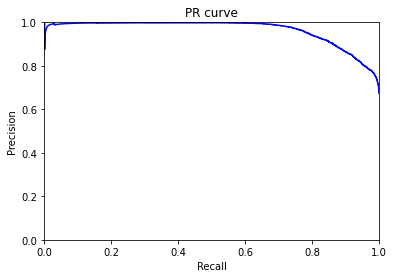

In [55]:
plot_precision_recall_curve(precisions, recalls)

In [56]:
fpr, tpr, _ = roc_curve(Y_test, clf_gs.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.9285509043491518

In [57]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

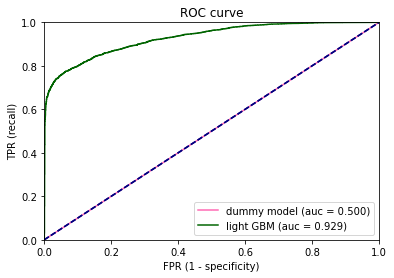

In [59]:
fpr_dummy, tpr_dummy, _ = roc_curve(Y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(Y_test, 
                                  clf_gs.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'light GBM', 'darkgreen')

In [60]:
human_new = pd.read_csv("work/human_new.csv", encoding="cp949")
s1=human_new['자본 이득']
s2=human_new['자본 손실']
s=s1+s2
s.rename("순이익",inplace=True)
human_new = pd.concat([human_new,s],axis=1)

In [61]:
human_new['나이대'] = (human_new['나이']/10).astype(int)
human_new['주당 시간별'] = (human_new['주당 시간']/10).astype(int)
human_new['fnlwgt2'] = (human_new['fnlwgt']/10000).astype(int)

In [62]:
working_class = pd.get_dummies(human_new["노동 계급"])
human_new = pd.concat([human_new, working_class], axis=1)
# human_new.drop("노동 계급", axis=1, inplace=True)

human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.str.lstrip())
human_new[["노동 계급"]] = human_new[["노동 계급"]].apply(lambda x: x.astype('category').cat.codes)

In [63]:
academic_ability = pd.get_dummies(human_new["학력"])
human_new = pd.concat([human_new,academic_ability],axis=1)
# human_new.drop("학력",axis=1,inplace=True)

human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.str.lstrip())
human_new[["학력"]] = human_new[["학력"]].apply(lambda x: x.astype('category').cat.codes)

In [64]:
marital_status = pd.get_dummies(human_new["혼인 상태"])
human_new = pd.concat([human_new,marital_status], axis=1)
# human_new.drop("혼인 상태", axis=1, inplace=True)

human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.str.lstrip())
human_new[["혼인 상태"]] = human_new[["혼인 상태"]].apply(lambda x: x.astype('category').cat.codes)

In [65]:
jobs = pd.get_dummies(human_new["직업"])
human_new = pd.concat([human_new, jobs], axis=1)
# human_new.drop("직업", axis=1, inplace=True)

human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.str.lstrip())
human_new[["직업"]] = human_new[["직업"]].apply(lambda x: x.astype('category').cat.codes)

In [66]:
relationship = pd.get_dummies(human_new["관계"])
human_new = pd.concat([human_new, relationship], axis=1)
# human_new.drop("관계", axis=1, inplace=True)

human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)

In [67]:
race = pd.get_dummies(human_new["인종"])
human_new = pd.concat([human_new, race], axis=1)
# human_new.drop("인종", axis=1, inplace=True)

human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.str.lstrip())
human_new[["인종"]] = human_new[["인종"]].apply(lambda x: x.astype('category').cat.codes)

In [68]:
homeland = pd.get_dummies(human_new["모국"])
human_new = pd.concat([human_new, homeland], axis=1)
# human_new.drop("모국", axis=1, inplace=True)
human_new["Holand-Netherlands"]=human_new[" Yugoslavia"]
human_new.loc[:,["Holand-Netherlands"]]=0

human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.str.lstrip())
human_new[["모국"]] = human_new[["모국"]].apply(lambda x: x.astype('category').cat.codes)

In [69]:
human_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Columns: 115 entries, 아이디 to Holand-Netherlands
dtypes: int32(3), int64(8), int8(7), object(1), uint8(96)
memory usage: 2.9+ MB


In [70]:
ndf = human_new.copy()
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Holand-Netherlands
0,H00001,25,3,226802,1,7,4,6,3,2,...,0,0,0,0,0,0,1,0,0,0
1,H00002,38,3,89814,11,9,2,4,0,4,...,0,0,0,0,0,0,1,0,0,0
2,H00003,28,1,336951,7,12,2,10,0,4,...,0,0,0,0,0,0,1,0,0,0
3,H00004,44,3,160323,15,10,2,6,0,2,...,0,0,0,0,0,0,1,0,0,0
4,H00005,18,-1,103497,15,10,4,-1,3,4,...,0,0,0,0,0,0,1,0,0,0


In [83]:
ndf['성별'] = lgbm_wrapper.predict_proba(ndf.loc[:, '나이':'Holand-Netherlands'])

In [84]:
ndf.shape

(16281, 116)

In [85]:
ndf_rename=ndf[['아이디','성별']]

In [86]:
ndf_rename = ndf_rename.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,SEX
0,H00001,0.601355
1,H00002,0.203256
2,H00003,0.203256
3,H00004,0.203256
4,H00005,0.762533


In [87]:
ndf_rename.to_csv('submission_human.csv', encoding='cp949', index=False)

In [88]:
ndf_rename.shape

(16281, 2)

In [64]:
human_train.corr()

,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
나이,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-0.015054,0.000375
노동 계급,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,...,-0.001972,-0.007519,0.002828,0.007878,-0.003368,0.009297,0.002176,-0.006187,-0.001497,0.002948
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-0.011398,0.005501
학력,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,...,-0.033219,-0.021629,0.004309,0.007396,0.005978,0.000213,-0.006791,0.092078,-0.004550,-0.006363
교육 수,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-0.007483,-0.001234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,-0.006271,0.009297,-0.001250,0.000213,0.007896,0.009531,-0.002567,0.005664,-0.064630,-0.014012,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-0.001068,-0.000521
Trinadad&Tobago,0.004843,0.002176,0.005273,-0.006791,-0.017071,0.001161,-0.001167,0.003577,-0.048922,-0.012744,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-0.001097,-0.000536
United-States,0.015917,-0.006187,-0.075287,0.092078,0.101207,-0.035131,-0.000305,-0.016294,0.224351,-0.006993,...,-0.098924,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-0.133180,-0.065031
Vietnam,-0.015054,-0.001497,-0.011398,-0.004550,-0.007483,0.010352,-0.015125,0.010585,-0.137826,-0.001205,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000,-0.001007


In [101]:
a=human_train.corr().성별.sort_values(ascending=False)

In [54]:
human_train['나이'] = (human_train['나이']/10).astype(int)

In [102]:
a=pd.DataFrame({"수치":a})

In [114]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 성별 to 관계
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수치      115 non-null    float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [113]:
for i,v in enumerate(a['수치']):
    if ((v>-1.0) and (v<1.0)) :
        print(v)

0.5801352648003859
0.43180545811342946
0.23568946222608525
0.2293091490264182
0.22312817750275654
0.13246788820685695
0.10745142628229438
0.10348624694398598
0.10009723650965793
0.09598083475032537
0.09402582601874208
0.08883173120974484
0.08762274910394074
0.08720430156363829
0.08401528263720216
0.08029644294812227
0.06476990040727498
0.05097797284054917
0.048793147111447305
0.048479646868691675
0.045567354678684426
0.036729116751779145
0.03129314968865496
0.03050199157934993
0.02952536095137569
0.026947031230594526
0.0268580452698733
0.026836574562376734
0.026046443254430143
0.02513316234783888
0.016968752680404178
0.013630536608212467
0.012280054339657419
0.011690465756782295
0.011684471462180306
0.011187318018610967
0.010050485108158796
0.00990169337152947
0.008879534658810688
0.008722291556379977
0.00675287184158819
0.005333360649173363
0.005187288259542612
0.0043446299626606006
0.0030875206952258472
0.0022586236466299306
0.0017255605790154084
0.0016226092120311902
0.0014368990593

,수치
성별,1.000000
Husband,0.580135
Married-civ-spouse,0.431805
주당 시간별,0.235689
주당 시간,0.229309
...,...
Divorced,-0.228621
Adm-clerical,-0.263148
Wife,-0.319311
Unmarried,-0.321273


In [100]:
for i,v in enumerate(a[['1']]):
    #if (v<1) and (v>-1) :
        print(v)

1


In [56]:
human_train['나이'].value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [53]:
a.value_counts()

3    8613
2    8054
4    7175
5    4418
6    2015
1    1657
7     508
8      78
9      43
Name: 나이, dtype: int64

In [4]:
human_train['나이'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: 나이, dtype: float64

In [66]:
human_train['fnlwgt'].value_counts()

18     1852
19     1815
17     1758
16     1537
20     1483
       ... 
116       1
148       1
88        1
118       1
95        1
Name: fnlwgt, Length: 99, dtype: int64

In [6]:
human_train.columns

Index(['아이디', '나이', '노동 계급', 'fnlwgt', '학력', '교육 수', '혼인 상태', '직업', '관계', '인종',
       '성별', '자본 이득', '자본 손실', '주당 시간', '모국'],
      dtype='object')

In [7]:
human_train['교육 수'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: 교육 수, dtype: int64

In [8]:
human_train['자본 이득'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: 자본 이득, Length: 119, dtype: int64

In [9]:
human_train['자본 손실'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: 자본 손실, Length: 92, dtype: int64

In [58]:
human_train['주당 시간'].sort_values()

19750     1
25078     1
11451     1
8447      1
32525     1
         ..
25806    99
30610    99
10143    99
4308     99
1887     99
Name: 주당 시간, Length: 32561, dtype: int64

In [59]:
human_train['주당 시간']

0        40
1        13
2        40
3        40
4        40
         ..
32556    38
32557    40
32558    40
32559    20
32560    40
Name: 주당 시간, Length: 32561, dtype: int64

In [64]:
human_train['fnlwgt'] = (human_train['fnlwgt']/10000).astype(int)

In [ ]:
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.str.lstrip())
human_new[["관계"]] = human_new[["관계"]].apply(lambda x: x.astype('category').cat.codes)